In [ ]:
import numpy as np
import pandas as pd
import xarray as xr
import math
import dask
import glob
import seaborn as sns
import seaborn as sns
import matplotlib.pyplot as plt
import cartopy.crs as ccrs

In [ ]:
from dask.distributed import Client, LocalCluster
if __name__ == "__main__":
    cluster=LocalCluster(host="tcp://127.0.0.1:2452",dashboard_address="127.0.0.1:2462",n_workers=4)
    client = Client(cluster)

In [ ]:
files = glob.glob("../FRONT_FILES/native/3-hourly/*.nc")

In [ ]:
models = []
for file in files:
    models.append(file.split('/')[-1].split('_')[0])

In [ ]:
two_deg = xr.open_dataset('../FRONT_FILES/2deg/3-hourly/ERA5_seasonal_fronts_2deg.nc')
new_lat = two_deg.latitude.values
new_lon = two_deg.longitude.values

In [ ]:
dic = {}
for model,file in zip(models,files):
    print(model)
    dic[model] = xr.open_dataset(file)
    dic[model] = dic[model].rename({'__xarray_dataarray_variable__':'front'})
    dic[model] = dic[model].front.fillna(0)
    dic[model] = dic[model].sortby('lat')
    dic[model] = dic[model].sortby('lon')
    dic[model] = dic[model].sel(time = slice('1981-03-01','2005-11-30'))
    dic[model] = dic[model].groupby(dic[model].time.dt.season).mean(dim='time',skipna=True)
    dic[model] = dic[model].interp(lat=new_lat, lon=new_lon,method='linear')
    dic[model] = dic[model].fillna(0)
    dic[model] = dic[model].sel(lat = slice(-60,-25))
    dic[model] = dic[model].sel(lon = slice(-30,10))
    dic[model] = dic[model]/(np.max(dic[model].values))

In [ ]:
import matplotlib.ticker as mticker

from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER

In [ ]:
levels = np.linspace(0, 1, 101) 

In [9]:
for index in ['NOAA']:
    for seas in ['DJF','MAM','JJA','SON']:
        ax = plt.axes(projection=ccrs.PlateCarree())
        #ax.coastlines('50m', linewidth=0.8)
        a = ax.contourf(dic[index].lon.values,dic[index].lat.values,dic[index].sel(season = seas).values,levels = levels,cmap='bwr_r')
        for c in a.collections:
            c.set_edgecolor("face")
        gl = ax.gridlines(crs=ccrs.PlateCarree(), linewidth=2, color='black', alpha=0.5, linestyle='--', draw_labels=True)
        gl.top_labels = False
        gl.left_lables = False
        gl.right_labels=True
        gl.xlines = True
        gl.xlocator = mticker.FixedLocator([-25,-15,-5,5,15])
        gl.ylocator = mticker.FixedLocator([-32,-40,-48,-56])
        gl.xformatter = LONGITUDE_FORMATTER
        gl.yformatter = LATITUDE_FORMATTER
        plt.title(str(seas))
        plt.savefig('../FRONT_OUT/seasonality/'+str(index)+'_'+str(seas)+".png")
        plt.savefig('../FRONT_OUT/seasonality/'+str(index)+'_'+str(seas)+".pdf")
        plt.close()



In [ ]:
plt.colorbar(a)
plt.savefig('../FRONT_OUT/seasonality/seasonality_cbar.pdf',orientation= 'horizontal')

In [8]:
levels = np.linspace(-1, 1, 201) 

In [11]:
for index in dic:
    if index == 'NOAA':
        pass
    else: 
        ref = dic['NOAA'].mean(dim='season')
        anom = dic[index].mean(dim='season') - ref
        ax = plt.axes(projection=ccrs.PlateCarree())
        ax.coastlines('50m', linewidth=0.8)
        a = ax.contourf(anom.lon.values,anom.lat.values,anom.values,levels = levels, cmap = 'bwr_r')
        for c in a.collections:
            c.set_edgecolor("face") 
        gl = ax.gridlines(crs=ccrs.PlateCarree(), linewidth=2, color='black', alpha=0.5, linestyle='--', draw_labels=True)
        gl.top_labels = False
        gl.left_lables = False
        gl.right_labels=True
        gl.xlines = True
        gl.xlocator = mticker.FixedLocator([-25,-15,-5,5,15])
        gl.ylocator = mticker.FixedLocator([-32,-40,-48,-56])
        gl.xformatter = LONGITUDE_FORMATTER
        gl.yformatter = LATITUDE_FORMATTER        
        plt.title(str(index))
        plt.savefig('../FRONT_OUT/annual_1981/'+str(index)+"_annual_1981.png")
        plt.savefig('../FRONT_OUT/annual_1981/'+str(index)+"_annual_1981.pdf")
        plt.close()

In [16]:
for index in dic:
    ref = dic[index].sel(season = 'DJF')
    anom = dic[index].sel(season = 'JJA') - ref
    ax = plt.axes(projection=ccrs.PlateCarree())
    ax.coastlines('50m', linewidth=0.8) 
    a = ax.contourf(anom.lon.values,anom.lat.values,anom.values,levels = levels, cmap = 'bwr_r')
    for c in a.collections:
        c.set_edgecolor("face")
    plt.title(str(index))
    plt.savefig('../FRONT_OUT/'+str(index)+'/'+str(index)+"_seasonality.png")
    plt.savefig('../FRONT_OUT/'+str(index)+'/'+str(index)+"_seasonality.pdf")
    plt.close()

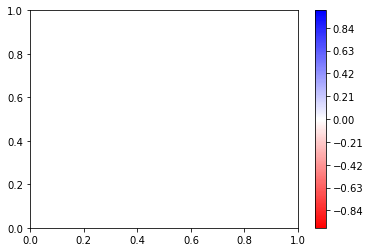

In [17]:
plt.colorbar(a)
plt.savefig('../FRONT_OUT/anom_cbar.pdf')

In [18]:
#client.close()

In [19]:
files = glob.glob("../FRONT_FILES/2deg/3-hourly/*")

In [20]:
models = []
for file in files:
    models.append(file.split('/')[-1].split('_')[0])

In [21]:
dic = {}
for model,file in zip(models,files):
    print(model)
    dic[model] = xr.open_dataset(file)
    dic[model] = dic[model].rename({'__xarray_dataarray_variable__':'front'})
    dic[model] = dic[model].front.fillna(0)
    dic[model] = dic[model].sel(lat = slice(-60,-25))
    dic[model] = dic[model].sel(lon = slice(-30,10))
    dic[model] = dic[model].sortby('lat')
    dic[model] = dic[model].sortby('lon')
    dic[model] = dic[model].groupby(dic[model].time.dt.season).mean(dim='time',skipna=True)
    dic[model] = dic[model]/(np.max(dic[model].values))

GFDL-ESM2M
MIROC-ESM-CHEM
NOAA
ACCESS1-3
BNU-ESM
MIROC4h
IPSL-CM5A-LR
MRI-CGCM3
IPSL-CM5A-MR
CNRM-CM5
ERA5
MIROC-ESM
bcc-csm1-1-m
GFDL-CM3
ACCESS1-0
MRI-ESM1
bcc-csm1-1
MIROC5
GFDL-ESM2G


In [22]:
for index in dic:
    if index == 'NOAA':
        pass
    else: 
        ref = dic['NOAA'].mean(dim='season')
        anom = dic[index].mean(dim='season') - ref
        ax = plt.axes(projection=ccrs.PlateCarree())
        ax.coastlines('50m', linewidth=0.8)
        a = ax.contourf(anom.lon.values,anom.lat.values,anom.values,levels = levels, cmap = 'bwr_r')
        for c in a.collections:
            c.set_edgecolor("face")   
        gl = ax.gridlines(crs=ccrs.PlateCarree(), linewidth=2, color='black', alpha=0.5, linestyle='--', draw_labels=True)
        gl.top_labels = False
        gl.left_lables = False
        gl.right_labels=True
        gl.xlines = True
        gl.xlocator = mticker.FixedLocator([-25,-15,-5,5,15])
        gl.ylocator = mticker.FixedLocator([-32,-40,-48,-56])
        gl.xformatter = LONGITUDE_FORMATTER
        gl.yformatter = LATITUDE_FORMATTER
        plt.title(str(index))
        plt.savefig('../FRONT_OUT/'+str(index)+'/'+str(index)+"_annual_2deg.png")
        plt.savefig('../FRONT_OUT/'+str(index)+'/'+str(index)+"_annual_2deg.pdf")
        plt.close()

In [23]:
client.close()